# Random Forests
This notebook introduces Random Forests for regression and classification tasks. We will use the data we've prepared in the Data Cleaning-section of this workshop. However, before we start with Random Forests we should introduce Decision Trees first to make you more familiar with the reasons why Random Forests are usually the better suited model. So let's get started!

## Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the more fitting the model becomes.

Some advantages of DTs are:

- DTs are simple to understand and to interpret. Trees can be visualised.
- DTs require little data preparation. Other techniques often require data normalisation, additional dummy variables and the removal of blank values. For this model, you only need to eliminate missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- DTs are able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable.
- DTs are able to handle multi-output problems.
- DTs are a white box model. If a given situation is observable in a model, the explanation of the decision is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- It is possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- DTs perform well even if their assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of DTs include:

- DT learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not shown here) which define a minimum number of samples for a leaf node or the maximum tree depth, are necessary to alleviate this issue.
- DTs can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
    DT learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset before fitting a DT to it.


To see both, the advantages and disadvantes, we will use our data to performing regression and classification. Then we will analyse the results we got.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

### Regression

In [25]:
# load data
data = pd.read_csv('../data/climate-data/prepared_data.csv', index_col=0)

# extract labels
y = data['DailyMaximumDryBulbTemperature']
X = data.drop(columns=['DailyMaximumDryBulbTemperature'])

In [26]:
# split data into train- and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
rt = DecisionTreeRegressor(max_depth=7)
rt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [28]:
y_hat = rt.predict(X_test)
mse = np.sum(1/2 * (y_hat - y_test) ** 2)
mse

1855.303646565503

We can easily visualize our Decision Tree:

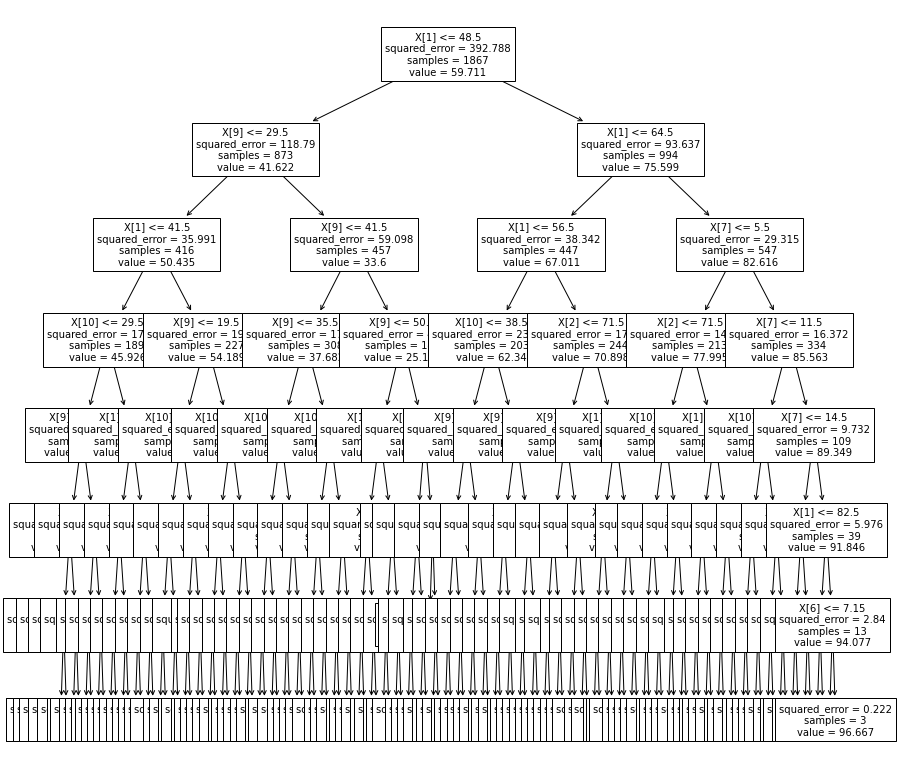

In [29]:
fig = plt.figure(figsize=(14, 14))
plot_tree(rt, fontsize=10)
plt.show()

### Classification

In [36]:
# load data
data = pd.read_csv('../data/credit-data/prepared_data.csv', index_col=0)

y = data['Credit_Score']
X = data.drop(columns=['Credit_Score'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
ct = DecisionTreeClassifier(max_depth=12)
ct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [54]:
y_hat = ct.predict(X_test)
acc = accuracy_score(y_pred=y_hat, y_true=y_test)
acc

0.7034666666666667

In [57]:
f1 = f1_score(y_test, y_hat, average='macro')
f1

0.6685103982853001

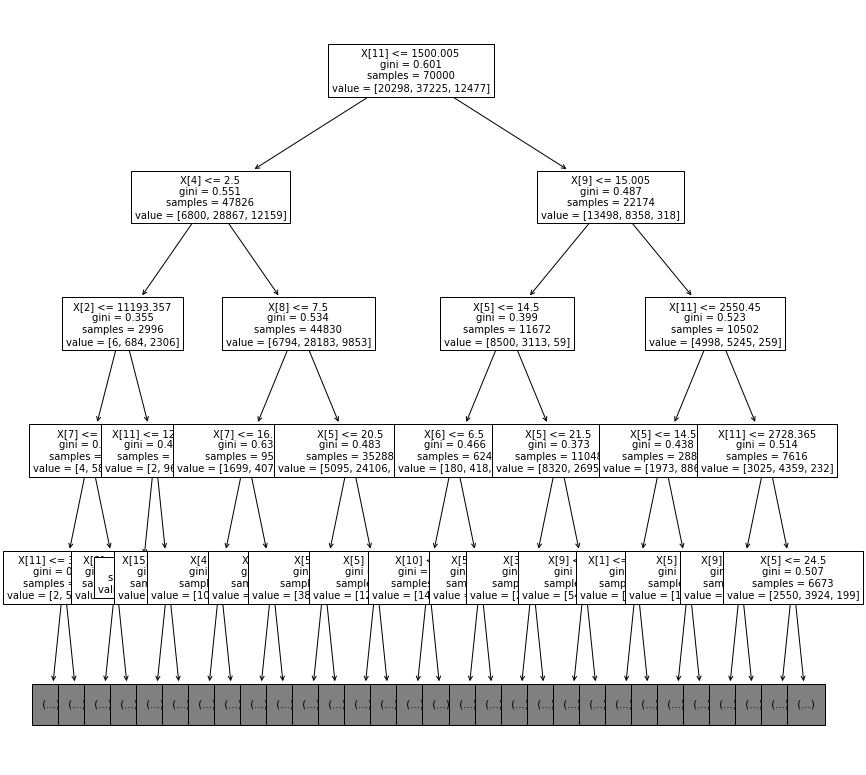

In [58]:
fig = plt.figure(figsize=(14, 14))
plot_tree(ct, fontsize=10, max_depth=4)
plt.show()

Now let' see what happens if we randomly select samples from the training-set s.t. our new training-set has 70% of the size of the old one. 

In [59]:
idx = np.random.randint(0, len(X_train), size=int(0.7*len(X_train)))
X_train, y_train = X_train.iloc[idx], y_train.iloc[idx]

In [60]:
ct = DecisionTreeClassifier(max_depth=12)
ct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

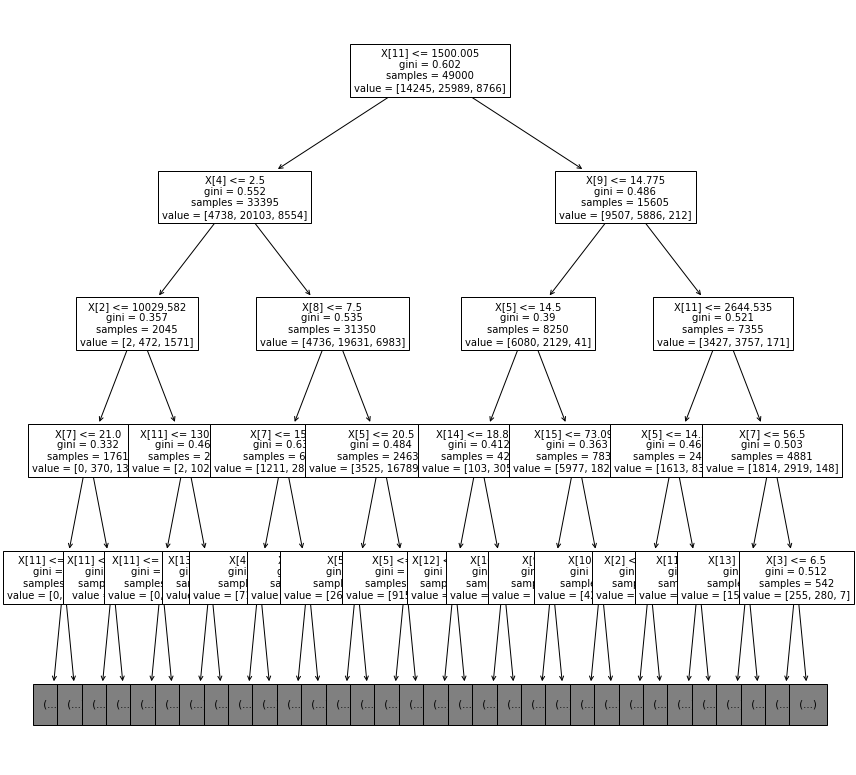

In [61]:
fig = plt.figure(figsize=(14, 14))
plot_tree(ct, fontsize=10, max_depth=4)
plt.show()

If we consider the third level of the tree, we observe that the nodes (i.e. the features) based on which the Decision Tree makes decisions are completely different. This means we have obtained a different model although - intuitively spoken - the trend in the data should not be corrupted since we selected the subset *randomly*. This is what wer refer to as a high *variance* of the model, i.e. given some slightly different dataset, what's the variance in the output of the learning algorithm? This variance is also reflected in the predictions made. Note that a high model variance does not necessarily mean that some models are worse than others. It could still be that they perform equally well, but do different kinds of missclassifications/errors. This way they achieve the same accuracy, but since they missclassify different samples from the test-set, the output differs. Thus only the variance is affected, not the bias of the model (i.e. the error or how far we're off).

To make the learning more stable, we can use Random Forests. These models, as discussed in the theory-session, train a set of Decision Trees on slightly different datasets and average over the outputs of the trees during inference. This way we include several DTs in our prediction, each possibly looking different due to the variance-problem of DTs. In turn, Random Forests do not have that high model-variances since it accounts for this by training several DTs.

> **Task**
> Try out different values for `max_depth` and try to find a better working value for it!

> **Task**
> Recap why Decision Trees suffer (on an intuitive level) from high model variance and think about why Random Forests are able to reduce the model variance.

In [17]:
# load data
data = pd.read_csv('../data/climate-data/prepared_data.csv', index_col=0)

# extract labels
y = data['DailyMaximumDryBulbTemperature']
X = data.drop(columns=['DailyMaximumDryBulbTemperature'])

In [18]:
# split data into train- and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
rf = RandomForestRegressor(n_estimators=20, max_depth=7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=20)

In [20]:
y_hat = rf.predict(X_test)
mse = np.sum(1/2 * (y_hat - y_test) ** 2)
mse

920.1326456688062

## Classification

In [21]:
# load data
data = pd.read_csv('../data/credit-data/prepared_data.csv', index_col=0)

y = data['Credit_Score']
X = data.drop(columns=['Credit_Score'])

In [22]:
# split data into train- and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
rf = RandomForestClassifier(n_estimators=20, max_depth=12)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=20)

In [24]:
y_hat = rf.predict(X_test)

In [25]:
acc = accuracy_score(y_pred=y_hat, y_true=y_test)
acc

0.7166666666666667

In [26]:
f1 = f1_score(y_test, y_hat, average='macro')
f1

0.6848880485983243

> **Task**
> Try out different values for `max_depth` and `n_estimators`. 
> 
> **Hint:** Maybe you can automate this and visualize your results!